<h3>Dragon Real Estate Price Prediction Model<h3>

<h4>EDA- Exploratory Data Analysis</h4>

In [1]:
# Required Packages Imported

import numpy as np
import scipy as sc
import matplotlib.pyplot as plt
import sklearn as sk
import pandas as pd

In [2]:
# Importing Our Dataset

housing = pd.read_csv('Housing_Data.csv')
housing.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,NaN,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [3]:
housing.info()  # Helps to detect any missing value(s)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       503 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
# Quick Insights on column having feature as 'CHAS'

housing['CHAS'].value_counts()

CHAS
0    471
1     35
Name: count, dtype: int64

In [5]:
# Getting a Mathematical Insight from the data 

housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,503.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.286692,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.703448,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.886000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.627000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

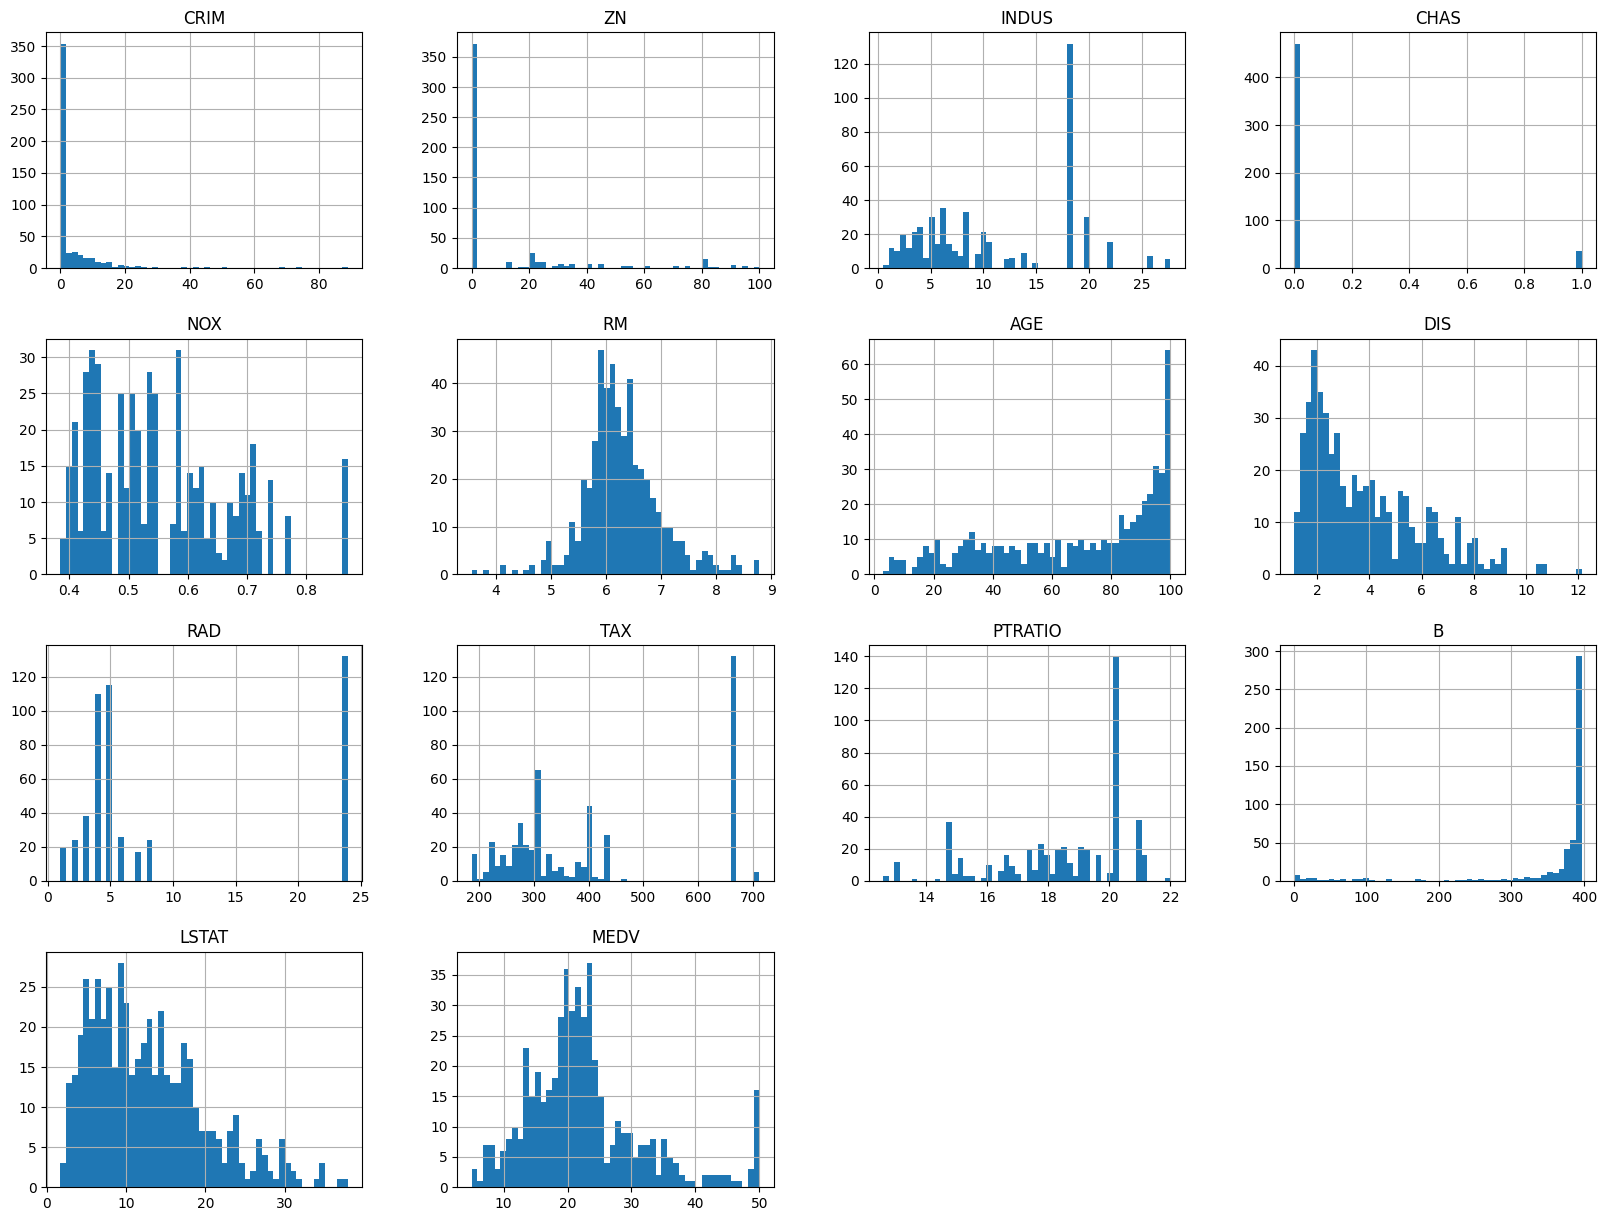

In [6]:
# Getting some visual idea from the data using histogram

%matplotlib inline
housing.hist(bins=50, figsize=(20,15))

<h4>Train-Test Split</h4>

In [7]:
# Taking out a piece of data from the dataset for testing purposes

def Train_Test_Split(data, test_ratio):
    np.random.seed(42)  # Used to avoid constant shuffling
    shuffled = np.random.permutation(len(data))
    print(shuffled)
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[ :test_set_size]
    train_indices = shuffled[ test_set_size :]
    return data.iloc[train_indices], data.iloc[test_indices]

In [8]:
train_set, test_set = Train_Test_Split(housing, 0.2)

[173 274 491  72 452  76 316 140 471 500 218   9 414  78 323 473 124 388
 195 448 271 278  30 501 421 474  79 454 210 497 172 320 375 362 467 153
   2 336 208  73 496 307 204  68  90 390  33  70 470   0  11 281  22 101
 268 485 442 290  84 245  63  55 229  18 351 209 395  82  39 456  46 481
 444 355  77 398 104 203 381 489  69 408 255 392 312 234 460 324  93 137
 176 417 131 346 365 132 371 412 436 411  86  75 477  15 332 423  19 325
 335  56 437 409 334 181 227 434 180  25 493 238 244 250 418 117  42 322
 347 182 155 280 126 329  31 113 148 432 338  57 194  24  17 298  66 211
 404  94 154 441  23 225 433 447   5 116  45  16 468 360   3 405 185  60
 110 321 265  29 262 478  26   7 492 108  37 157 472 118 114 175 192 272
 144 373 383 356 277 220 450 141 369  67 361 168 499 394 400 193 249 109
 420 145  92 152 222 304  83 248 165 163 199 231  74 311 455 253 119 284
 302 483 357 403 228 261 237 386 476  36 196 139 368 247 287 378  59 111
  89 266   6 364 503 341 158 150 177 397 184 318  1

In [9]:
print("Number of rows in Training Set: ", len(train_set))
print("Number of rows in Test Set: ", len(train_set))

Number of rows in Training Set:  405
Number of rows in Test Set:  405


In [10]:
# Using Sklearn's Train Test Split function

from sklearn.model_selection import train_test_split
train_index, test_index = train_test_split(housing, test_size=0.2, random_state=42)

In [11]:
# Performing Stratified Shuffle Split for splitting data evenly across Train and Test Sets
from sklearn.model_selection import StratifiedShuffleSplit
split_Data = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split_Data.split(housing, housing['CHAS']):
    strat_train_index = housing.loc[train_index]
    strat_test_index = housing.loc[test_index]


In [12]:
# Data is almost split evenly in train and test set

strat_test_index['CHAS'].value_counts()             #  95/7  = 13.57
strat_train_index['CHAS'].value_counts()            # 376/28 = 13.42

CHAS
0    376
1     28
Name: count, dtype: int64

In [13]:
housing = strat_train_index.copy()

<h4>Finding Correlations</h4>

In [14]:
corr_Housing = housing.corr()

In [15]:
corr_Housing['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.679796
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

<style>
<h4>Finding Correlations</h4>
h4.text_align = center;
</style>

array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='PTRATIO', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='PTRATIO', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='PTRATIO'>,
        <Axes: xlabel='ZN', ylabel='PTRATIO'>,
        <Axes: xlabel='PTRATIO', ylabel='PTRATIO'>,
        <Axes: xlabel='LSTAT', ylabel='PTRATIO'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='PTRATIO', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

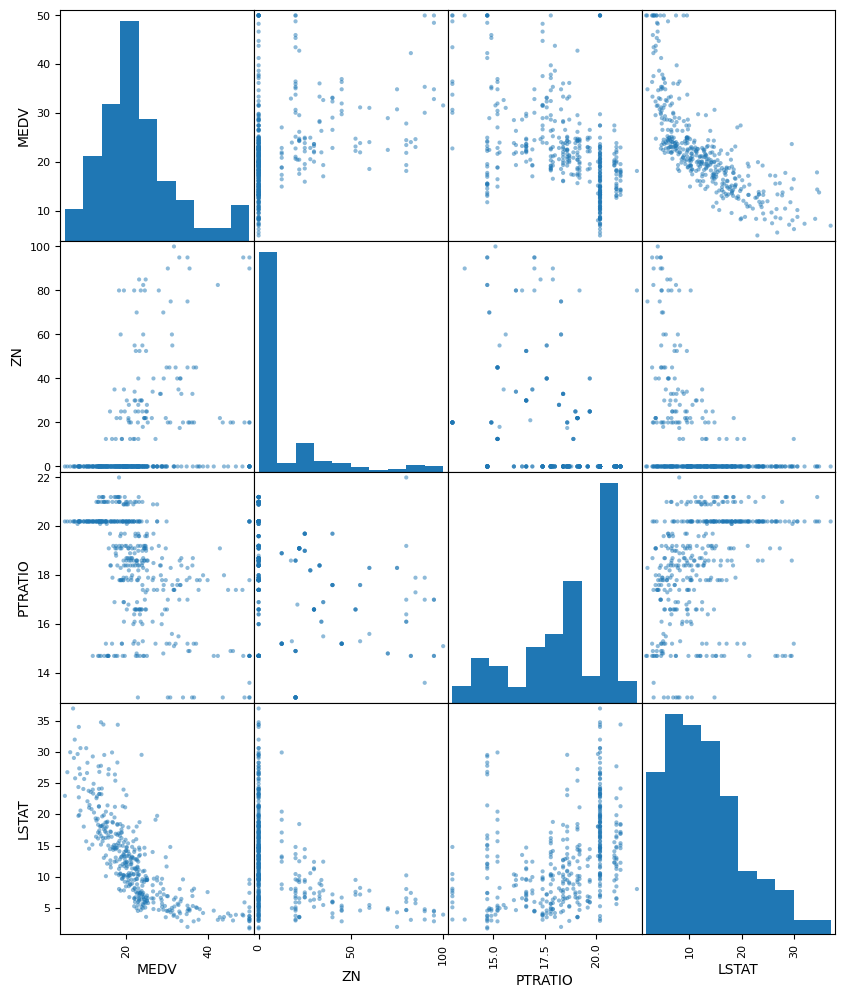

In [16]:
# Understanding relationships using Scatter Plot

from pandas.plotting import scatter_matrix
attributes = ['MEDV', 'ZN', 'PTRATIO', 'LSTAT']
scatter_matrix(housing[attributes], figsize=(10, 12))

<Axes: xlabel='RM', ylabel='MEDV'>

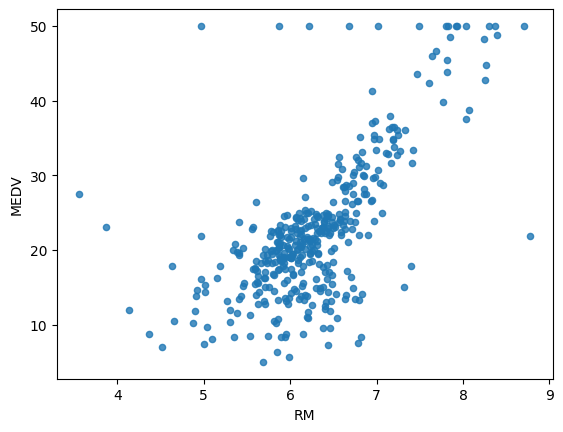

In [17]:
housing.plot(kind="scatter", x = "RM", y = "MEDV", alpha = 0.8)

<h4>Trying Out Different Combinations</h4>

In [18]:
# Combination 1: TAX and RM

housing["TAXBYRM"] = housing["TAX"] / housing["RM"]
housing.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXBYRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


<Axes: xlabel='TAXBYRM', ylabel='MEDV'>

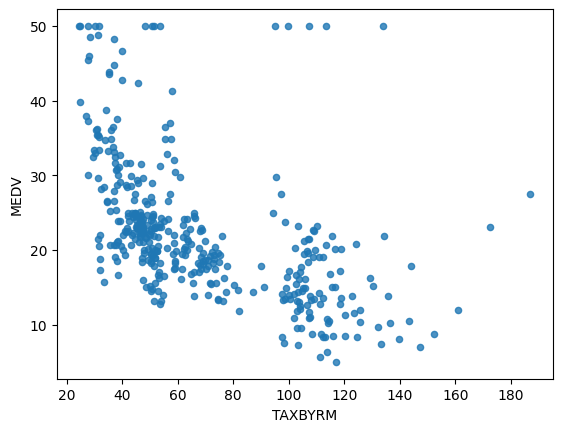

In [19]:
housing.plot(kind="scatter", x = "TAXBYRM", y = "MEDV", alpha = 0.8)

In [20]:
corr_Housing = housing.corr()
corr_Housing['MEDV'].sort_values(ascending = False)

MEDV       1.000000
RM         0.679796
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXBYRM   -0.525490
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [21]:
# Combination 2: CRIM and LSTAT

housing["CRIM_LSTAT"] = housing["CRIM"] * housing["LSTAT"]

In [22]:
corr_Housing = housing.corr()
corr_Housing['MEDV'].sort_values(ascending = False)

MEDV          1.000000
RM            0.679796
B             0.361761
ZN            0.339741
DIS           0.240451
CHAS          0.205066
AGE          -0.364596
RAD          -0.374693
CRIM         -0.393715
CRIM_LSTAT   -0.422266
NOX          -0.422873
TAX          -0.456657
INDUS        -0.473516
PTRATIO      -0.493534
TAXBYRM      -0.525490
LSTAT        -0.740494
Name: MEDV, dtype: float64

In [23]:
# 3 values randomly removed from RM column, affecting RMBYTAX column too

housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 254 to 216
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CRIM        404 non-null    float64
 1   ZN          404 non-null    float64
 2   INDUS       404 non-null    float64
 3   CHAS        404 non-null    int64  
 4   NOX         404 non-null    float64
 5   RM          402 non-null    float64
 6   AGE         404 non-null    float64
 7   DIS         404 non-null    float64
 8   RAD         404 non-null    int64  
 9   TAX         404 non-null    int64  
 10  PTRATIO     404 non-null    float64
 11  B           404 non-null    float64
 12  LSTAT       404 non-null    float64
 13  MEDV        404 non-null    float64
 14  TAXBYRM     402 non-null    float64
 15  CRIM_LSTAT  404 non-null    float64
dtypes: float64(13), int64(3)
memory usage: 53.7 KB


In [24]:
# Dropping or removing missing values or cells

housing.dropna(subset="RM")

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXBYRM,CRIM_LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709,0.316608
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452,0.089910
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374,90.997939
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547,1.247523
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948,1.866341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6,65.507152,53.095850
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4,109.126659,164.204282
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8,35.294118,0.292276
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1,102.068966,86.160468


In [25]:
housing.dropna(subset='TAXBYRM')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXBYRM,CRIM_LSTAT
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709,0.316608
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452,0.089910
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374,90.997939
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547,1.247523
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948,1.866341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403,14.7,88.01,15.02,15.6,65.507152,53.095850
423,7.05042,0.0,18.10,0,0.614,6.103,85.1,2.0218,24,666,20.2,2.52,23.29,13.4,109.126659,164.204282
98,0.08187,0.0,2.89,0,0.445,7.820,36.9,3.4952,2,276,18.0,393.53,3.57,43.8,35.294118,0.292276
455,4.75237,0.0,18.10,0,0.713,6.525,86.5,2.4358,24,666,20.2,50.92,18.13,14.1,102.068966,86.160468


In [26]:
housing = strat_train_index.drop("MEDV", axis=1)
housing_labels = strat_train_index["MEDV"].copy()

<h4>Dealing with Missing Values</h4>
<p>1. Remove null or missing values or cells using (dropna() ).</p>
<p>2. Drop the entire column containing nulls or missing values using drop keyword.</p>
<p>3. Compute the Median of the column with nulls and fill the nulls with the median value.</p>

In [27]:
housing.shape
updated_housing = housing["RM"].dropna()
updated_housing.shape

(402,)

In [28]:
# Dropped entire column containing nulls or missing values

RM_dropped = housing.drop('RM', axis=1)
RM_dropped.head()


,CRIM,ZN,INDUS,CHAS,NOX,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
254,0.04819,80.0,3.64,0,0.392,32.0,9.2203,1,315,16.4,392.89,6.57
348,0.01501,80.0,2.01,0,0.435,29.7,8.3440,4,280,17.0,390.94,5.99
476,4.87141,0.0,18.10,0,0.614,93.6,2.3053,24,666,20.2,396.21,18.68
321,0.18159,0.0,7.38,0,0.493,54.3,4.5404,5,287,19.6,396.90,6.87
326,0.30347,0.0,7.38,0,0.493,28.9,5.4159,5,287,19.6,396.90,6.15


In [29]:
# Calculating a median value in RM column

median = housing["RM"].median
median

<bound method Series.median of 254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64>

In [30]:
# Filling all the null or missing values with the median

housing['RM'].fillna(median)

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98      7.82
455    6.525
216    5.888
Name: RM, Length: 404, dtype: object

In [31]:
# Calculates Mean value of RM column

mean = housing['RM'].mean();
mean

6.280256218905471

In [32]:
dropped_NA = housing["RM"].dropna()
dropped_NA

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 402, dtype: float64

In [33]:
# Using sklearn's imputer 

from sklearn.impute import SimpleImputer
simpleImp = SimpleImputer(strategy='median')
simpleImp.fit(housing)

SimpleImputer(strategy='median')

In [34]:
# Displays the Median Calculation

simpleImp.statistics_

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21000e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [35]:
# Using mean as the strategy (calculates mean values)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer.fit(housing)

SimpleImputer()

In [36]:
# Displays all the Mean Calculations

imputer.statistics_

array([3.60281403e+00, 1.08366337e+01, 1.13449505e+01, 6.93069307e-02,
       5.58063614e-01, 6.28025622e+00, 6.90398515e+01, 3.74620965e+00,
       9.73514851e+00, 4.12341584e+02, 1.84732673e+01, 3.53392822e+02,
       1.27916089e+01])

In [37]:
X = imputer.transform(housing)
housing_tr = pd.DataFrame(X, columns=housing.columns)
housing_tr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.04819,80.0,3.64,0.0,0.392,6.108,32.0,9.2203,1.0,315.0,16.4,392.89,6.57
1,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
2,4.87141,0.0,18.10,0.0,0.614,6.484,93.6,2.3053,24.0,666.0,20.2,396.21,18.68
3,0.18159,0.0,7.38,0.0,0.493,6.376,54.3,4.5404,5.0,287.0,19.6,396.90,6.87
4,0.30347,0.0,7.38,0.0,0.493,6.312,28.9,5.4159,5.0,287.0,19.6,396.90,6.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,3.53501,0.0,19.58,1.0,0.871,6.152,82.6,1.7455,5.0,403.0,14.7,88.01,15.02
400,7.05042,0.0,18.10,0.0,0.614,6.103,85.1,2.0218,24.0,666.0,20.2,2.52,23.29
401,0.08187,0.0,2.89,0.0,0.445,7.820,36.9,3.4952,2.0,276.0,18.0,393.53,3.57
402,4.75237,0.0,18.10,0.0,0.713,6.525,86.5,2.4358,24.0,666.0,20.2,50.92,18.13


In [38]:
housing.describe()  # df with missing values
housing_tr.describe() # df with imputed values

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.280256,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712798,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.878750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.213500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


<h3> Sci-kit Learn Design</h3>
It has three types of Objects: 

 <b>1) Estimators</b>: It estimates some parameters based on a dataset. Eg: An Imputer.
 - Methods:
 i) Fit(): Fits to the dataset.
 ii) Transform(): Transforms and gets applied to all the dataset.

<b>2) Transformers</b>: It takes input and gives output based on learnings of fit() method. Also have a convenience function called fit_transform() function.
- Methods:
fit_transform(): First fits to the dataset and transforms the entire dataset based on the parameter.

<b>3) Predictors</b>: Predicts values or gives a categorical output. Eg: Linear Regression model.
- Methods:
i) fit(): First fits to the dataset and transforms the entire dataset based on the parameter.
ii) predict(): Predicts the output

Note: Also have score function which gives scores to the predictions made by the model.

<h3>Creating a Pipeline</h3>

In [39]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'mean')),
    ('stdscaler', StandardScaler())
])

In [40]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [41]:
housing_num_tr.shape

(404, 13)

<h3>Selecting a model for our dataset</h3>

In [90]:
from sklearn.linear_model import LinearRegression
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
model = LinearRegression()
# model1 = DecisionTreeRegressor()
# model2 = RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)
# model1.fit(housing_num_tr, housing_labels)
# model2.fit(housing_num_tr, housing_labels)

LinearRegression()

In [91]:
some_data = housing.iloc[:5]

In [92]:
some_labels = housing_labels[:5]

In [93]:
prepared_data = my_pipeline.transform(some_data)

<h3>Predicting Results from the model</h3>

Below is the values generated by the model followed by a comparison with the labels attribute of the dataframe.

In [94]:
model.predict(prepared_data)

array([23.95278311, 27.21537177, 20.57739553, 25.0390785 , 23.76142403])

In [95]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

<h3>Evaluating the Model</h3>

In [96]:
# from sklearn.metrics import mean_squared_error
# housing_predictions = model.predict(housing_num_tr)
# lin_mse = mean_squared_error(housing_predictions, housing_labels)
# lin_rmse = np.sqrt(lin_mse)

In [97]:
# lin_mse

Here, as we can see the current model is not performing well as the error is considerably more.

<h3>Using Cross Validation Method</h3>

In [98]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model2, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv = 10)
rmse_scores = np.sqrt(-scores)


In [99]:
rmse_scores

array([2.8400429 , 2.74614163, 4.29902577, 2.63399416, 3.47447686,
       2.661111  , 4.53360055, 3.40389918, 3.23392862, 3.20593112])

As we can see the error rates have dropped down considerably as compared to the error rates we were getting by using linearRegression model

In [100]:
# Getting some mathematical insights

def print_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())

In [101]:
print_scores(rmse_scores)

Scores:  [2.8400429  2.74614163 4.29902577 2.63399416 3.47447686 2.661111
 4.53360055 3.40389918 3.23392862 3.20593112]
Mean:  3.30321517949431
Standard Deviation:  0.6280313364830702


<h3>Saving our model using joblib</h3>

In [102]:
from joblib import dump, load
dump(model, 'Dragon_real_estates_lin_reg.joblib')

['Dragon_real_estates_lin_reg.joblib']